<a href="https://colab.research.google.com/github/Leon-web-net/ES327_Project/blob/main/ES327_Yolov10n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import shutil

shutil.rmtree('runs/detect/delete')

In [ ]:
# Model info
from ultralytics import YOLO

model_info_path = "./runs/detect/yolov3/weights/best.pt"
model = YOLO(model_info_path)
model.info()

YOLOv3 summary: 180 layers, 103,697,090 parameters, 0 gradients, 283.0 GFLOPs


(180, 103697090, 0, 283.00190719999995)

Example

In [ ]:
from os.path import exists
# Model validation
from ultralytics import YOLO
import torch
import os

model_path = "./runs/detect/yolo10l/weights/best.pt"
model = YOLO(model_path)
save_path = "./runs/detect/"

# Base name for the image and annotation files
base_img_name = "0000"  # Base name for the image files
base_ann_name = "0000"  # Base name for the annotation files

# Range of numbers to loop through (e.g., 0001 to 0010)
start_num = 41
end_num = 50  # Adjust this based on the number of images you want to process

# Loop through the range of numbers
for num in range(start_num, end_num + 1):
    # Format the number to match the file naming convention (e.g., 0001, 0002, etc.)
    num_str = f"{num:04d}"  # Ensures the number is 4 digits (e.g., 0001, 0002)

    # Construct the image and annotation paths
    img = base_img_name + num_str
    ann_path = f"./datasets/Nuim_dataset_Yv8_test/labels/val/{img}.txt"
    img_path = f"./datasets/Nuim_dataset_Yv8_test/images/val/{img}.jpg"

    # Check if the image file exists
    if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue  # Skip to the next iteration if the image doesn't exist

    # Run prediction on the image
    print(f"Processing image: {img_path}")
    model.predict(
        img_path,
        save=True,          # Save the results
        imgsz=640,          # Image size for inference
        verbose=False,      # Disable verbose output
        conf=0.5,           # Confidence threshold
        project=save_path,  # Directory to save results
        name="",            # Prevents creation of a new subfolder
        line_width=3,        # Line width for bounding boxes
        exist_ok =True
    )

print("Prediction loop completed.")

# 41 45 47 50

Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000041.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000042.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000043.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000044.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000045.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000046.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000047.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000048.jpg
Results saved to runs/detect/predict
Processing image: ./datasets/Nuim_dataset_Yv8_test/images/val/00000049.jpg
Results saved to runs/detect/

In [ ]:
import os

start =48
end = 49
for num in range(start, end + 1):
      num_str = f"{num:04d}"
      img_name = "0000"+num_str +".jpg"
      img_path = './runs/detect/predict/' + img_name
          # Check if the image file exists
      if not os.path.exists(img_path):
        print(f"Image not found: {img_path}")
        continue  # Skip to the next iteration if the image doesn't exist

      os.remove(img_path)
      print(f"image {img_path} deleted")

image ./runs/detect/predict/00000048.jpg deleted
image ./runs/detect/predict/00000049.jpg deleted


In [ ]:
import cv2

img_num = [41, 45, 47, 50]
# Path to the image and annotation file
img_path = "./datasets/Nuim_dataset_Yv8_test/images/val/00000001.jpg"
ann_path = "./datasets/Nuim_dataset_Yv8_test/labels/val/00000001.txt"


# Define class names and their corresponding colors
class_names = {
    0: "pedestrian",
    1: "car",
    2: "bus",
    3: "bicycle",
    4: "truck",
    5: "motorcycle"
}

class_colors = {
    0: (255, 0, 0),       # Blue for pedestrian
    1: (255, 255, 0),     # Cyan for car
    2: (255, 255, 255),   # White for bus
    3: (0, 255, 0),       # Green for bicycle
    4: (139,0,0),       # Dark blue for truck
    5: (255, 192, 203)    # Pink for motorcycle
}


for num in img_num:
    # Construct the 8-digit filename
    img_name = f"{num:08d}"  # Ensures the number is 8 digits (e.g., 00000011, 00000012)

    # Construct the image and annotation paths
    img_path = f"./datasets/Nuim_dataset_Yv8_test/images/val/{img_name}.jpg"
    ann_path = f"./datasets/Nuim_dataset_Yv8_test/labels/val/{img_name}.txt"


    # Load the image
    image = cv2.imread(img_path)

    # Check if the image was loaded successfully
    if image is None:
        raise FileNotFoundError(f"Image not found at {img_path}")

    # Load ground truth bounding boxes from the annotation file
    with open(ann_path, 'r') as file:
        for line in file:
            # Parse the YOLO format: [class_id, x_center, y_center, width, height]
            class_id, x_center, y_center, width, height = map(float, line.split())
            class_id = int(class_id)  # Convert class_id to integer

            # Convert YOLO format to (x1, y1, x2, y2) for OpenCV
            img_height, img_width = image.shape[:2]
            x1 = int((x_center - width / 2) * img_width)
            y1 = int((y_center - height / 2) * img_height)
            x2 = int((x_center + width / 2) * img_width)
            y2 = int((y_center + height / 2) * img_height)

            # Get the color for the current class
            color = class_colors.get(class_id, (0, 0, 0))  # Default to black if class_id is not found

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 3)

            # Add the class label
            label = f"{class_names.get(class_id, 'unknown')}"
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # Save or display the image with ground truth bounding boxes
    output_path = f"./runs/detect/predict/gt_{img_name}.jpg"
    cv2.imwrite(output_path, image)
    print(f"Image with ground truth bounding boxes saved to {output_path}")


Image with ground truth bounding boxes saved to ./runs/detect/predict/gt_00000041.jpg
Image with ground truth bounding boxes saved to ./runs/detect/predict/gt_00000045.jpg
Image with ground truth bounding boxes saved to ./runs/detect/predict/gt_00000047.jpg
Image with ground truth bounding boxes saved to ./runs/detect/predict/gt_00000050.jpg


# Evaluation on Test

In [ ]:
# Model validation
from ultralytics import YOLO
import torch
import os

model_path = "./runs/detect/yolo10l/weights/best.pt"
model = YOLO(model_path)

yaml_path = "./datasets/Nuim_dataset_Yv8_test/nuim_dataset.yaml"
save_path = "delete"
validation_results = model.val(data=yaml_path, name = save_path,
                               imgsz=640,conf=0.5, batch=6,
                               verbose=True,half=True )

Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10l summary (fused): 197 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]
val: Scanning /content/drive/MyDrive/datasets/Nuim_dataset_Yv8_test/labels/val.cache... 431 images, 0 backgrounds, 0 corrupt: 100%|██████████| 431/431 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 72/72 [00:14<00:00,  4.98it/s]


                   all        431       3408       0.85      0.545      0.711      0.526
            pedestrian        245       1041      0.918      0.442      0.681       0.43
                   car        337       1625      0.879       0.65      0.786      0.627
                   bus        130        150      0.804      0.493      0.667      0.544
               bicycle        119        167      0.813      0.599      0.748      0.538
                 truck        181        255      0.775      0.431      0.584      0.445
            motorcycle        124        170       0.91      0.653      0.801       0.57
Speed: 0.3ms preprocess, 11.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/delete


In [ ]:
# Extract specific metrics
print(f"mAP@0.5: {validation_results.box.map50}")
print(f"mAP@0.5-0.95: {validation_results.box.map}")
print(f"Precision: {validation_results.box.p}")
print(f"Recall: {validation_results.box.r}")
print(f"F1-Score: {validation_results.box.f1}")

f1 = validation_results.box.f1
f1_avg = sum(f1) / len(f1)
print(f"Average F1-Score: {f1_avg}")

# Speed metrics
print(f"Inference time (ms): {validation_results.speed['inference']}")
print(f"Preprocessing time (ms): {validation_results.speed['preprocess']}")
print(f"Postprocessing time (ms): {validation_results.speed['postprocess']}")



In [ ]:
import pandas as pd
import os

# Define root directory
root = "./runs/detect/"

# Define model structure with multiple folders per model
model_structure = {
    "YOLOv10L": ["yolo10l/results.csv"],
    "YOLOv10M": ["yolo10m/results.csv", "yolo10m_200/results.csv"],
    "YOLOv10N": ["yolo10n/results.csv", "yolo10n_200/results.csv"]
}

# Create a dictionary to store all the extracted data
all_data = {}

# Process each model's results.csv files
for model_name, folder_paths in model_structure.items():
    model_df = None

    # Process each folder for the current model
    for folder_path in folder_paths:
        full_path = os.path.join(root, folder_path)

        try:
            # Check if file exists
            if not os.path.exists(full_path):
                print(f"Warning: File {full_path} does not exist.")
                continue

            # Read the CSV file
            df = pd.read_csv(full_path)

            # Extract the required columns
            if 'epoch' in df.columns and 'metrics/mAP50(B)' in df.columns and 'metrics/mAP50-95(B)' in df.columns:
                extracted_data = df[['epoch', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']]

                # If this is the first file for this model or a new model
                if model_df is None:
                    model_df = extracted_data
                else:
                    # Concatenate the data and sort by epoch
                    model_df = pd.concat([model_df, extracted_data])
                    model_df = model_df.drop_duplicates(subset=['epoch']).sort_values('epoch')

                print(f"Successfully extracted data from {full_path}")
            else:
                print(f"Error: Required columns not found in {full_path}")

        except Exception as e:
            print(f"Error processing {full_path}: {e}")

    # Rename columns for the combined model data
    if model_df is not None:
        model_df = model_df.rename(columns={
            'metrics/mAP50(B)': f'{model_name}_mAP50',
            'metrics/mAP50-95(B)': f'{model_name}_mAP50-95'
        })
        all_data[model_name] = model_df

# If we have data for any models, merge them on epoch
if all_data:
    # Start with the first model's data
    first_model = list(all_data.keys())[0]
    result_df = all_data[first_model]

    # Merge with other models' data
    for model_name in list(all_data.keys())[1:]:
        cols_to_merge = ['epoch', f'{model_name}_mAP50', f'{model_name}_mAP50-95']
        result_df = pd.merge(result_df, all_data[model_name][cols_to_merge],
                             on='epoch', how='outer')

    # Sort by epoch
    result_df = result_df.sort_values('epoch')

    # Save to a new CSV file
    output_path = "./combined_model_metrics.csv"
    result_df.to_csv(output_path, index=False)
    print(f"Combined data saved to {output_path}")
else:
    print("No data was successfully extracted.")

Successfully extracted data from ./runs/detect/yolo10l/results.csv
Successfully extracted data from ./runs/detect/yolo10m/results.csv
Successfully extracted data from ./runs/detect/yolo10m_200/results.csv
Successfully extracted data from ./runs/detect/yolo10n/results.csv
Successfully extracted data from ./runs/detect/yolo10n_200/results.csv
Combined data saved to ./combined_model_metrics.csv


# Train

In [ ]:
from ultralytics import YOLO

model_path = "./runs/detect/yolo10l/weights/last.pt"
# Load a COCO-pretrained YOLOv8n model
model = YOLO(model_path)
yaml_path = "./datasets/Nuim_dataset_Yv8/nuim_dataset.yaml"


save_path = "yolo10L_Wchange_V2"
# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data=yaml_path, epochs=100, imgsz=640,batch=16, warmup_epochs= 0.0,
                      box = 6.0,
                      cls = 1.0,
                      dfl = 2.5,
                      # lr0=0.001,
                      # patience = 10,
                      name = save_path,
                      # resume=True,
                      # augment=True,
                      hsv_h=0.015,               # Hue augmentation
                      hsv_s=0.7,                 # Saturation augmentation
                      hsv_v=0.4,                 # Brightness augmentation
                      translate=0.1,             # Random translation
                      scale=0.2,                 # Random scaling
                      flipud=0.0,                # Random vertical flip
                      fliplr=0.5,                # Random horizontal flip
                      mosaic=1.0,
                      mixup=0.1,                 # Mixup augmentation
                      degrees=10.0,              # Random rotation
                  )


Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=./runs/detect/yolo10l/weights/last.pt, data=./datasets/Nuim_dataset_Yv8/nuim_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolo10L_Wchange_V2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1    137728  ultralytics.nn.modules.block.SCDown          [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1    268800  ultralytics.nn.modules.block.SCDown          [512

train: Scanning /content/drive/MyDrive/datasets/Nuim_dataset_Yv8/labels/train.cache... 3433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3433/3433 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/datasets/Nuim_dataset_Yv8/labels/val.cache... 858 images, 0 backgrounds, 0 corrupt: 100%|██████████| 858/858 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolo10L_Wchange_V2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 167 weight(decay=0.0), 180 weight(decay=0.0005), 179 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolo10L_Wchange_V2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.9G      2.258      4.768      3.801        121        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.33it/s]


                   all        858       7087      0.688      0.499      0.564      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      13.3G      2.228      4.267      3.758        103        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.92it/s]


                   all        858       7087       0.64      0.511      0.554      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      13.3G      2.167       4.09      3.686        164        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.68it/s]


                   all        858       7087      0.698      0.509       0.58      0.339

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      13.3G      2.148      3.958      3.647        142        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]


                   all        858       7087      0.696      0.519      0.583      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      13.3G      2.124      3.862      3.605         62        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]


                   all        858       7087      0.703       0.54      0.609      0.362

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      13.3G      2.104      3.782      3.603        118        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        858       7087      0.701      0.512      0.588      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      13.3G      2.115      3.814      3.606        116        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]


                   all        858       7087      0.705      0.514       0.59      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      13.3G      2.076      3.646       3.57         73        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.57it/s]


                   all        858       7087      0.726      0.523      0.601      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      13.3G      2.056      3.564      3.545        118        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]


                   all        858       7087      0.703       0.54      0.603      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      13.3G      2.033      3.539      3.532        120        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]

                   all        858       7087      0.732      0.546      0.622      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      13.3G      2.029      3.491      3.509        110        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.63it/s]


                   all        858       7087      0.761       0.54      0.623      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      13.3G      2.015      3.397      3.484         87        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]


                   all        858       7087      0.722      0.551      0.618      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      13.3G      1.994      3.368      3.497        187        640: 100%|██████████| 215/215 [00:48<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        858       7087      0.739      0.541      0.615      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      13.3G      1.987      3.351      3.472         88        640: 100%|██████████| 215/215 [00:48<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.70it/s]


                   all        858       7087      0.754      0.553      0.632      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      13.3G      1.982      3.351      3.457        114        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]


                   all        858       7087      0.762      0.542      0.629       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      13.3G      1.966      3.263       3.44        119        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]


                   all        858       7087      0.744      0.547      0.626      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      13.3G      1.963      3.265       3.43        118        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]


                   all        858       7087      0.731      0.564      0.632      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.3G      1.941      3.179      3.417        160        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.62it/s]


                   all        858       7087      0.734       0.56      0.634      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      13.3G      1.939      3.202      3.433        143        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]

                   all        858       7087      0.764      0.554      0.641        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      13.3G      1.911        3.1      3.385        106        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]


                   all        858       7087      0.712      0.571      0.632      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      13.3G      1.903      3.073      3.394        129        640: 100%|██████████| 215/215 [00:48<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]


                   all        858       7087       0.73      0.568       0.64        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      13.3G      1.893      3.048      3.384        127        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.81it/s]

                   all        858       7087      0.772      0.554      0.637      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      13.3G      1.876      2.967      3.352        145        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.67it/s]


                   all        858       7087      0.762      0.559      0.637      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      13.3G      1.876       3.01      3.378        104        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]


                   all        858       7087      0.753      0.561      0.637      0.397

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      13.3G      1.844      2.897      3.338        123        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]


                   all        858       7087      0.737      0.563      0.636        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      13.3G      1.832      2.919      3.335        151        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]

                   all        858       7087      0.753      0.562      0.635      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      13.3G      1.841      2.939      3.344         64        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]


                   all        858       7087      0.743      0.568      0.647      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      13.3G      1.823      2.892      3.324        179        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]


                   all        858       7087      0.744       0.58      0.648      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      13.3G      1.832      2.875      3.318        129        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]


                   all        858       7087      0.755      0.556      0.631      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      13.3G      1.826      2.815      3.293        165        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]


                   all        858       7087      0.747      0.584       0.65      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      13.3G      1.798      2.794      3.298        121        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.62it/s]


                   all        858       7087      0.759      0.575      0.648      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      13.3G      1.797      2.783      3.294        112        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]

                   all        858       7087      0.751      0.579      0.643       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.3G      1.788      2.736      3.285        155        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]


                   all        858       7087      0.751      0.567      0.637      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      13.3G      1.772      2.743      3.283        149        640: 100%|██████████| 215/215 [00:48<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]


                   all        858       7087      0.771      0.566      0.646      0.407

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      13.3G      1.773      2.713      3.283        114        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]

                   all        858       7087      0.724       0.58      0.645      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      13.3G      1.751       2.67      3.256         86        640: 100%|██████████| 215/215 [00:48<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.98it/s]

                   all        858       7087      0.732      0.573      0.642      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      13.3G      1.749      2.636      3.244        190        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.81it/s]


                   all        858       7087      0.778      0.559      0.646      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      13.3G       1.76      2.689       3.27        152        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.68it/s]

                   all        858       7087      0.762      0.559      0.635      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      13.3G      1.748      2.659      3.248        138        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]


                   all        858       7087      0.731      0.578      0.642      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      13.3G      1.748      2.672      3.259        102        640: 100%|██████████| 215/215 [00:49<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]

                   all        858       7087       0.76       0.57      0.645      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      13.3G      1.726      2.606      3.224        101        640: 100%|██████████| 215/215 [00:48<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]


                   all        858       7087      0.795      0.541       0.64      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      13.3G      1.717      2.577      3.232        115        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]


                   all        858       7087      0.789      0.556      0.647      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      13.3G      1.701      2.541      3.216         92        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.88it/s]

                   all        858       7087      0.776      0.578      0.653      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      13.3G       1.71      2.547      3.209        154        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]

                   all        858       7087       0.77      0.569      0.655      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      13.3G      1.686      2.522      3.216        160        640: 100%|██████████| 215/215 [00:48<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]


                   all        858       7087      0.743      0.579      0.646      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      13.3G      1.684      2.485      3.198        178        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]

                   all        858       7087      0.765      0.571      0.647      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      13.3G      1.654      2.437      3.182        103        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.58it/s]


                   all        858       7087       0.78       0.56      0.643      0.417

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.3G      1.675      2.466       3.19        160        640: 100%|██████████| 215/215 [00:48<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]

                   all        858       7087      0.743      0.571      0.638      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      13.3G       1.65      2.439      3.185         82        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]

                   all        858       7087      0.794      0.566      0.651      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      13.3G      1.632      2.393      3.174        169        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.79it/s]

                   all        858       7087      0.752      0.576       0.65       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      13.3G      1.629      2.376       3.16         83        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.91it/s]

                   all        858       7087      0.791       0.56      0.639      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      13.3G      1.665      2.461       3.18        129        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.53it/s]

                   all        858       7087      0.765      0.578      0.652      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      13.3G      1.642      2.408      3.164        178        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]

                   all        858       7087      0.771      0.569      0.648      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      13.3G      1.616       2.35       3.15        147        640: 100%|██████████| 215/215 [00:48<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.56it/s]

                   all        858       7087      0.794      0.554       0.64      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      13.3G      1.629      2.387      3.156        178        640: 100%|██████████| 215/215 [00:49<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.79it/s]

                   all        858       7087      0.755      0.568      0.646      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      13.3G      1.618      2.375      3.153         93        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]

                   all        858       7087      0.769      0.579      0.651      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      13.3G      1.605      2.317      3.142        122        640: 100%|██████████| 215/215 [00:48<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.74it/s]

                   all        858       7087      0.774      0.575      0.651       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      13.3G      1.614      2.346      3.141        105        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]


                   all        858       7087      0.755      0.591      0.658      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      13.3G      1.596      2.318      3.139         92        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]


                   all        858       7087      0.779      0.578      0.656      0.422

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      13.3G      1.595      2.319      3.136        120        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]

                   all        858       7087      0.768      0.573      0.646      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      13.3G      1.584      2.268      3.116        131        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.48it/s]


                   all        858       7087      0.782      0.563      0.653      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      13.3G       1.57      2.251      3.109        125        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]

                   all        858       7087      0.789      0.561      0.649      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      13.3G      1.576      2.304      3.135        134        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        858       7087      0.772       0.57      0.649      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      13.3G      1.548      2.206      3.095        161        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]

                   all        858       7087      0.799      0.558      0.651      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.3G      1.556      2.224      3.108        136        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.45it/s]

                   all        858       7087      0.801      0.564      0.654      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.3G      1.555      2.218      3.098        101        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.62it/s]

                   all        858       7087      0.774      0.578      0.656      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      13.3G      1.532       2.18      3.102         99        640: 100%|██████████| 215/215 [00:49<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]

                   all        858       7087      0.799      0.559      0.649      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.3G      1.534      2.174      3.091        120        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]

                   all        858       7087      0.798      0.566      0.651      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      13.3G      1.522      2.179      3.093         97        640: 100%|██████████| 215/215 [00:48<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]

                   all        858       7087       0.79      0.565      0.645      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.3G      1.509      2.128      3.082        146        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.98it/s]

                   all        858       7087      0.791      0.557      0.648      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.3G       1.51      2.156      3.086        159        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.65it/s]


                   all        858       7087      0.798      0.568      0.652      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      13.3G       1.49      2.114      3.063         90        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.71it/s]

                   all        858       7087      0.769      0.569      0.649      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.3G      1.512      2.148      3.074        128        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]

                   all        858       7087      0.779      0.575      0.648      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      13.3G        1.5      2.122      3.066        144        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        858       7087       0.78      0.565       0.65      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      13.3G      1.498      2.122      3.071        160        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.90it/s]

                   all        858       7087      0.773       0.58      0.659      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      13.3G      1.479       2.08       3.06        162        640: 100%|██████████| 215/215 [00:49<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]

                   all        858       7087      0.762      0.585      0.661      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      13.3G       1.46      2.038       3.05        103        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        858       7087      0.805      0.574      0.656      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      13.3G       1.49      2.117      3.059        112        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]

                   all        858       7087      0.777      0.577      0.654      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.3G      1.466      2.068      3.055        122        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.74it/s]

                   all        858       7087      0.785      0.575      0.655      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      13.3G      1.472      2.071      3.052        115        640: 100%|██████████| 215/215 [00:49<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.82it/s]

                   all        858       7087      0.791      0.564      0.646      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      13.3G      1.463      2.082      3.053        176        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.59it/s]

                   all        858       7087      0.787      0.567       0.65      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      13.3G      1.448      2.025      3.039        104        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        858       7087      0.786      0.569       0.65      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.3G      1.426      1.967      3.019        104        640: 100%|██████████| 215/215 [00:49<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.92it/s]

                   all        858       7087      0.786      0.566      0.648      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      13.3G      1.421      1.986      3.022        107        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.68it/s]

                   all        858       7087      0.808      0.568      0.653      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      13.3G      1.421      1.987      3.022         89        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]

                   all        858       7087      0.793      0.569      0.656      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.3G      1.413      1.957      3.009        153        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.73it/s]

                   all        858       7087      0.814      0.555       0.66      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.3G      1.419      1.998      3.016        135        640: 100%|██████████| 215/215 [00:49<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.01it/s]

                   all        858       7087      0.777      0.579      0.659      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      13.3G      1.415      1.977      3.029        104        640: 100%|██████████| 215/215 [00:49<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]

                   all        858       7087      0.788      0.569      0.657      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      13.3G      1.401       1.96       3.02        177        640: 100%|██████████| 215/215 [00:49<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.64it/s]

                   all        858       7087      0.799      0.567      0.653      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      13.3G      1.407      1.961      3.018        135        640: 100%|██████████| 215/215 [00:49<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]

                   all        858       7087      0.808      0.561      0.655      0.434


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      13.3G      1.282      1.529      2.849         98        640: 100%|██████████| 215/215 [00:50<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]

                   all        858       7087      0.803      0.558       0.65       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      13.3G       1.26      1.503      2.843         68        640: 100%|██████████| 215/215 [00:48<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]

                   all        858       7087      0.808       0.56      0.655      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      13.3G      1.247      1.479      2.827         73        640: 100%|██████████| 215/215 [00:48<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.72it/s]

                   all        858       7087      0.787      0.565       0.65       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      13.3G      1.242      1.476      2.826         66        640: 100%|██████████| 215/215 [00:48<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.66it/s]

                   all        858       7087       0.78      0.567      0.648      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      13.3G      1.223      1.452      2.821        108        640: 100%|██████████| 215/215 [00:48<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.89it/s]

                   all        858       7087      0.787      0.567      0.648      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      13.3G      1.222      1.442      2.817         53        640: 100%|██████████| 215/215 [00:48<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.71it/s]

                   all        858       7087      0.807      0.554      0.648       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      13.3G      1.218      1.433      2.823         30        640: 100%|██████████| 215/215 [00:48<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.73it/s]

                   all        858       7087      0.799      0.563      0.651      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      13.3G      1.213      1.437      2.821        106        640: 100%|██████████| 215/215 [00:48<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.71it/s]

                   all        858       7087      0.806      0.555      0.648       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      13.3G      1.199      1.409      2.809         63        640: 100%|██████████| 215/215 [00:48<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.55it/s]

                   all        858       7087      0.792      0.561      0.649      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      13.3G      1.202      1.423      2.806         60        640: 100%|██████████| 215/215 [00:48<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]

                   all        858       7087      0.799      0.561      0.651      0.431



100 epochs completed in 1.547 hours.
Optimizer stripped from runs/detect/yolo10L_Wchange_V2/weights/last.pt, 52.2MB
Optimizer stripped from runs/detect/yolo10L_Wchange_V2/weights/best.pt, 52.2MB

Validating runs/detect/yolo10L_Wchange_V2/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv10l summary (fused): 197 layers, 25,725,620 parameters, 0 gradients, 126.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:06<00:00,  4.17it/s]


                   all        858       7087       0.79       0.57      0.657      0.434
            pedestrian        507       2169      0.851      0.475      0.603      0.325
                   car        666       3380      0.813      0.725      0.791      0.573
                   bus        263        311      0.797       0.58      0.676      0.485
               bicycle        223        332      0.735      0.554      0.623      0.397
                 truck        338        554       0.74      0.417      0.518      0.346
            motorcycle        253        341      0.802      0.666      0.731      0.481
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to runs/detect/yolo10L_Wchange_V2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Get image from dataset

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


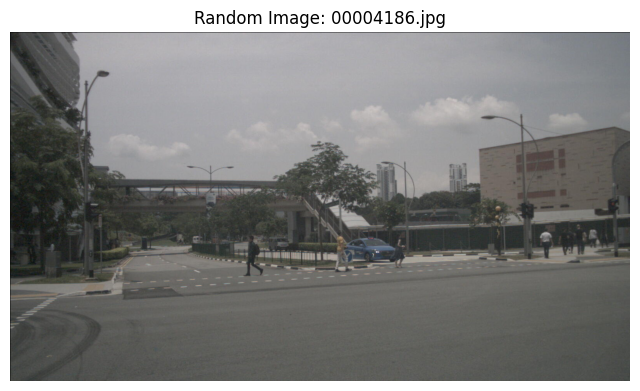

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

# Path to the image directory
path_2_images = "./datasets/Nuim_dataset_Yv8/images/train"

# Get a random image filename
random_image = random.choice(os.listdir(path_2_images))

# Construct the full image path
image_path = os.path.join(path_2_images, random_image)

# Read and display the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR (OpenCV default) to RGB

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")  # Hide axis
plt.title(f"Random Image: {random_image}")
plt.show()


Odds of ambulance in dataset (40 in original)

In [ ]:
import math
from scipy.stats import hypergeom

# Parameters
N = 93000 - 431 # Total population
K = 40     # Number of ambulances in population
n = 4722 - 431  # Sample size (adjust as needed)

# Compute probabilities for k = 1 to 40
# Compute probabilities for k >= 1 to 40
probabilities = {}
for k in range(1, 41):
    prob = hypergeom.sf(k-1, N, K, n)  # P(X >= k)
    probabilities[k] = prob
    print(f"P(X >= {k}) = {prob:.6f}")

# Probability of at least one ambulance
prob_at_least_one = probabilities[1]  # Same as P(X >= 1)
print(f"P(X >= 1) = {prob_at_least_one:.6f}")

P(X >= 1) = 0.850274
P(X >= 2) = 0.559030
P(X >= 3) = 0.282919
P(X >= 4) = 0.112926
P(X >= 5) = 0.036516
P(X >= 6) = 0.009789
P(X >= 7) = 0.002216
P(X >= 8) = 0.000430
P(X >= 9) = 0.000072
P(X >= 10) = 0.000011
P(X >= 11) = 0.000001
P(X >= 12) = 0.000000
P(X >= 13) = 0.000000
P(X >= 14) = 0.000000
P(X >= 15) = 0.000000
P(X >= 16) = 0.000000
P(X >= 17) = 0.000000
P(X >= 18) = 0.000000
P(X >= 19) = 0.000000
P(X >= 20) = 0.000000
P(X >= 21) = 0.000000
P(X >= 22) = 0.000000
P(X >= 23) = 0.000000
P(X >= 24) = 0.000000
P(X >= 25) = 0.000000
P(X >= 26) = 0.000000
P(X >= 27) = 0.000000
P(X >= 28) = 0.000000
P(X >= 29) = 0.000000
P(X >= 30) = 0.000000
P(X >= 31) = 0.000000
P(X >= 32) = 0.000000
P(X >= 33) = 0.000000
P(X >= 34) = 0.000000
P(X >= 35) = 0.000000
P(X >= 36) = 0.000000
P(X >= 37) = 0.000000
P(X >= 38) = 0.000000
P(X >= 39) = 0.000000
P(X >= 40) = 0.000000
P(X >= 1) = 0.850274
